In [2]:
import pandas as pd
import numpy as np
from pprint import pprint
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd
import os
from pandas import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from numpy import arange, sin, pi, random
from utils import *
from sklearn.metrics import f1_score
%matplotlib inline 
plt.style.use('seaborn-colorblind')

In [3]:
data = ReadDatatime('./train.csv')

In [4]:
KPI_LIST,KPI_ID=SplitKPIList(data)

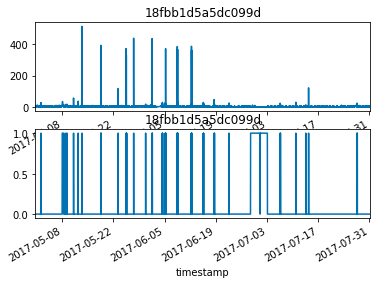

In [9]:
plot_ts_label(15,KPI_LIST,KPI_ID)

In [10]:
d=pd.read_csv('./train.csv')

In [16]:
d.head()

,timestamp,value,label,KPI ID
0,1493568000,1.901639,0,02e99bd4f6cfb33f
1,1493568060,1.786885,0,02e99bd4f6cfb33f
2,1493568120,2.000000,0,02e99bd4f6cfb33f
3,1493568180,1.885246,0,02e99bd4f6cfb33f
4,1493568240,1.819672,0,02e99bd4f6cfb33f


In [18]:
KPI_LIST[6]

ValueError: cannot copy sequence with size 3 to array axis with dimension 147024

In [15]:
d.isnull().describe()

,timestamp,value,label,KPI ID
count,2476315,2476315,2476315,2476315
unique,1,1,1,1
top,False,False,False,False
freq,2476315,2476315,2476315,2476315


# DONUT

In [137]:
data=pd.read_csv('./train.csv')

In [139]:
data.head()

,timestamp,value,label,KPI ID
0,1493568000,1.901639,0,02e99bd4f6cfb33f
1,1493568060,1.786885,0,02e99bd4f6cfb33f
2,1493568120,2.000000,0,02e99bd4f6cfb33f
3,1493568180,1.885246,0,02e99bd4f6cfb33f
4,1493568240,1.819672,0,02e99bd4f6cfb33f


In [1]:
from rpy2.robjects.packages import importr

In [2]:
utils = importr("AnomalyDetection")

/Users/lovelycute/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Error in loadNamespace(name) : 
  不存在叫‘AnomalyDetection’这个名字的程辑包

  warnings.warn(x, RRuntimeWarning)


RRuntimeError: Error in loadNamespace(name) : 
  不存在叫‘AnomalyDetection’这个名字的程辑包


In [70]:
pre_data = KPI_LIST[5]['value']

In [3]:
# import rpy2's package module
import rpy2.robjects.packages as rpackages

# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list
# R package names
packnames = ('twitter/AnomalyDetection')

# R vector of strings
from rpy2.robjects.vectors import StrVector

# Selectively install what needs to be install.
# We are fancy, just because we can.
names_to_install = [x for packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

SyntaxError: invalid syntax (<ipython-input-3-c0c807afe2f1>, line 17)

In [75]:
index_data=pre_data.reset_index()['value']

In [77]:
from luminol.anomaly_detector import AnomalyDetector
score_list=[]
my_detector = AnomalyDetector(index_data.to_dict())
score = my_detector.get_all_scores()
for timestamp, value in score.iteritems():
    score_list.append(value)


In [124]:
pre=pd.Series(score_list)

In [125]:
pre.describe()

count    147680.000000
mean      17080.517389
std       19820.900652
min           0.000000
25%         346.000000
50%        7642.000000
75%       30852.500000
max       79202.000000
dtype: float64

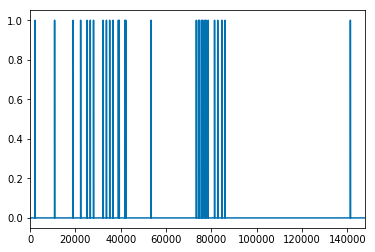

In [132]:
pre=pd.Series(score_list)
pre[pre<=10*7642]=0
pre[pre>10*7642]=1
pre.plot()

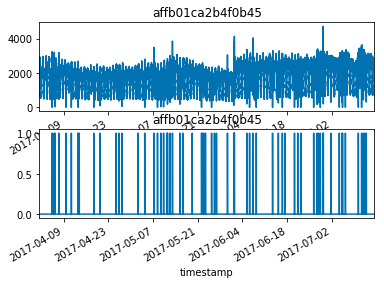

In [81]:
plot_ts_label(5,KPI_LIST,KPI_ID)

In [133]:
f1_score(label['label'], pre) 

0.0

In [127]:
pre

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        0.0
         ... 
147650    0.0
147651    0.0
147652    0.0
147653    0.0
147654    0.0
147655    0.0
147656    0.0
147657    0.0
147658    0.0
147659    0.0
147660    0.0
147661    0.0
147662    0.0
147663    0.0
147664    0.0
147665    0.0
147666    0.0
147667    0.0
147668    0.0
147669    0.0
147670    0.0
147671    0.0
147672    0.0
147673    0.0
147674    0.0
147675    0.0
147676    0.0
147677    0.0
147678    0.0
147679    0.0
Length: 147680, dtype: float64

In [115]:
label = KPI_LIST[5]['label']
label=label.reset_index()


In [105]:
pre_data

timestamp
2017-04-01 10:08:00    2015.0
2017-04-01 10:09:00    1942.0
2017-04-01 10:10:00    2054.0
2017-04-01 10:11:00    2030.0
2017-04-01 10:12:00    1860.0
2017-04-01 10:13:00    2096.0
2017-04-01 10:14:00    1919.0
2017-04-01 10:15:00    1912.0
2017-04-01 10:16:00    1910.0
2017-04-01 10:17:00    1962.0
2017-04-01 10:18:00    2074.0
2017-04-01 10:19:00    1912.0
2017-04-01 10:20:00    1879.0
2017-04-01 10:21:00    1965.0
2017-04-01 10:22:00    2011.0
2017-04-01 10:23:00    1922.0
2017-04-01 10:24:00    1826.0
2017-04-01 10:25:00    1972.0
2017-04-01 10:26:00    1845.0
2017-04-01 10:27:00    1893.0
2017-04-01 10:28:00    1856.0
2017-04-01 10:29:00    1866.0
2017-04-01 10:30:00    1913.0
2017-04-01 10:31:00    1967.0
2017-04-01 10:32:00    2033.0
2017-04-01 10:33:00    1976.0
2017-04-01 10:34:00    1988.0
2017-04-01 10:35:00    1963.0
2017-04-01 10:36:00    1901.0
2017-04-01 10:37:00    1869.0
                        ...  
2017-07-15 06:58:00    2541.0
2017-07-15 06:59:00    2555.0


In [42]:
data=RedaPredata('./tdata.csv')
result=RedaPredata('./foo.csv')

In [60]:
result['anoms']=1

In [61]:
data.loc[result.index]['label']

timestamp
2017-04-28 13:36:00    1
2017-04-28 13:37:00    1
2017-04-28 13:38:00    1
2017-04-28 13:39:00    1
2017-04-28 13:40:00    1
2017-04-28 13:41:00    1
2017-04-28 13:42:00    1
2017-04-28 13:43:00    1
2017-04-30 23:40:00    1
2017-05-01 00:06:00    1
2017-05-01 00:11:00    1
2017-05-01 00:25:00    1
2017-05-01 00:26:00    1
2017-05-01 00:28:00    1
2017-05-01 00:32:00    1
2017-05-01 00:34:00    1
2017-05-01 00:35:00    1
2017-05-01 00:36:00    1
2017-05-01 00:39:00    1
2017-05-01 00:40:00    1
2017-05-01 00:41:00    1
2017-05-01 00:42:00    1
2017-05-01 00:43:00    1
2017-05-01 00:45:00    1
2017-05-01 00:46:00    1
2017-05-01 00:47:00    1
2017-05-01 00:48:00    1
2017-05-01 00:49:00    1
2017-05-01 00:50:00    1
2017-05-01 00:51:00    1
                      ..
2017-06-03 12:46:00    1
2017-06-03 12:47:00    1
2017-06-03 12:48:00    1
2017-06-03 12:49:00    1
2017-06-03 12:50:00    1
2017-06-03 12:51:00    1
2017-06-03 12:52:00    1
2017-06-03 12:53:00    1
2017-06-03 12:5

In [64]:
res=pd.merge(data, result, how='outer',left_index=True,right_index=True)
me=res.fillna(0)
f1_score(me['label'], me['anoms']) 

0.5652573529411765

In [65]:
KPI_LIST[5].describe()

,value,label
count,147680.000000,147680.000000
mean,1766.516299,0.003954
std,691.173819,0.062761
min,0.000000,0.000000
25%,1141.000000,0.000000
50%,1866.000000,0.000000
75%,2324.000000,0.000000
max,4712.000000,1.000000


,Unnamed: 0,anoms
timestamp,,
2017-04-28 13:36:00,1,1
2017-04-28 13:37:00,2,1
2017-04-28 13:38:00,3,1
2017-04-28 13:39:00,4,1
2017-04-28 13:40:00,5,1
2017-04-28 13:41:00,6,1
2017-04-28 13:42:00,7,1
2017-04-28 13:43:00,8,1
2017-04-30 23:40:00,9,1


# LSTM异常检测

In [15]:
def gen_wave():
    """ Generate a synthetic wave by adding up a few sine waves and some noise
    :return: the final wave
    """
    t = np.arange(0.0, 10.0, 0.01)
    wave1 = sin(2 * 2 * pi * t)
    noise = random.normal(0, 0.1, len(t))
    wave1 = wave1 + noise
    print("wave1", len(wave1))
    wave2 = sin(2 * pi * t)
    print("wave2", len(wave2))
    t_rider = arange(0.0, 0.5, 0.01)
    wave3 = sin(10 * pi * t_rider)
    print("wave3", len(wave3))
    insert = int(round(0.8 * len(t)))
    wave1[insert:insert + 50] = wave1[insert:insert + 50] + wave3
    return wave1 + wave2

In [14]:
def build_model():
    model = Sequential()
    layers = {'input': 1, 'hidden1': 64, 'hidden2': 256, 'hidden3': 100, 'output': 1}

    model.add(LSTM(
            input_length=sequence_length - 1,
            input_dim=layers['input'],
            output_dim=layers['hidden1'],
            return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
            layers['hidden2'],
            return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
            layers['hidden3'],
            return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
            output_dim=layers['output']))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop")
    print("Compilation Time : ", time.time() - start)
    return model

In [57]:
def z_norm(result):
    result_mean = result.mean()
    result_std = result.std()
    result -= result_mean
    result /= result_std
    return result, result_mean
def get_split_prep_data(data,train_start, train_end,
                          test_start, test_end):
    data = gen_wave()
    print("Length of Data", len(data))

    # train data
    print("Creating train data...")

    result = []
    for index in range(train_start, train_end - sequence_length):
        result.append(data[index: index + sequence_length])
    result = np.array(result)  # shape (samples, sequence_length)
    result, result_mean = z_norm(result)

    print("Mean of train data : ", result_mean)
    print("Train data shape  : ", result.shape)

    train = result[train_start:train_end, :]
    np.random.shuffle(train)  # shuffles in-place
    X_train = train[:, :-1]
    y_train = train[:, -1]
    X_train, y_train = dropin(X_train, y_train)

    # test data
    print("Creating test data...")

    result = []
    for index in range(test_start, test_end - sequence_length):
        result.append(data[index: index + sequence_length])
    result = np.array(result)  # shape (samples, sequence_length)
    result, result_mean = z_norm(result)

    print("Mean of test data : ", result_mean)
    print("Test data shape  : ", result.shape)

    X_test = result[:, :-1]
    y_test = result[:, -1]

    print("Shape X_train", np.shape(X_train))
    print("Shape X_test", np.shape(X_test))

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    return X_train, y_train, X_test, y_test

In [58]:
sequence_length = len(np.array(pd.DataFrame(KPI_LIST[5])['value']))
get_split_prep_data(np.array(pd.DataFrame(KPI_LIST[5])['value']),0,int(sequence_length*0.8),int(sequence_length*0.8),sequence_length)

wave1 1000
wave2 1000
wave3 50
Length of Data 1000
Creating train data...
Mean of train data :  nan
Train data shape  :  (0,)


/Users/lovelycute/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice.
  
/Users/lovelycute/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/lovelycute/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/lovelycute/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/lovelycute/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: too many indices for array

In [49]:
gen_wave().shape[0]

wave1 1000
wave2 1000
wave3 50


1000

In [48]:
np.array(pd.DataFrame(KPI_LIST[5])['value']).shape[0]

112627

In [60]:
X_train, y_train, X_test, y_test = get_split_prep_data('s',0, 700, 500, 1000)

wave1 1000
wave2 1000
wave3 50
Length of Data 1000
Creating train data...
Mean of train data :  nan
Train data shape  :  (0,)


/Users/lovelycute/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice.
  
/Users/lovelycute/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/lovelycute/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/lovelycute/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/lovelycute/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: too many indices for array